In [1]:
import pandas as pd
import numpy as np

In [2]:
diabetes = pd.read_csv(r'C:\wimpie\DINAS\archive\diabetes.csv')

In [3]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes['Outcome']

NameError: name 'train_test_split' is not defined

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (587, 8)
X_val (104, 8)
X_test (77, 8)


In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [15]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.6730769230769231


In [16]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.6883116883116883


C:\Users\AMAR BANK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN: 0.6883116883116883


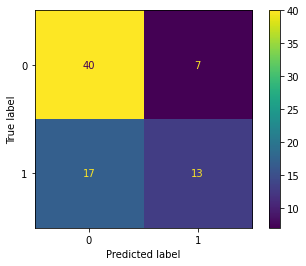

In [17]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [18]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [19]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [29]:
model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_val,Y_val))

Epoch 1/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4320 - acc: 0.8058 - val_loss: 0.7574 - val_acc: 0.7115
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4774 - acc: 0.7615 - val_loss: 0.7798 - val_acc: 0.7500
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4875 - acc: 0.7717 - val_loss: 1.1331 - val_acc: 0.5673
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5006 - acc: 0.7802 - val_loss: 0.7275 - val_acc: 0.7692
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4291 - acc: 0.7922 - val_loss: 0.8595 - val_acc: 0.6827
Epoch 6/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4586 - acc: 0.7632 - val_loss: 0.7466 - val_acc: 0.7788
Epoch 7/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4007 - acc: 0.8109 - val_loss: 0.7281 - val_acc: 0.7500
Epoch 8/100
59/59 [==============================] - 0s 3ms/step - loss: 0.4209 - a

59/59 [==============================] - 0s 2ms/step - loss: 0.3856 - acc: 0.8211 - val_loss: 0.7645 - val_acc: 0.6923
Epoch 64/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3961 - acc: 0.8245 - val_loss: 0.7809 - val_acc: 0.7404
Epoch 65/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4226 - acc: 0.8075 - val_loss: 0.8131 - val_acc: 0.7692
Epoch 66/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4020 - acc: 0.8126 - val_loss: 0.7869 - val_acc: 0.7500
Epoch 67/100
59/59 [==============================] - 0s 3ms/step - loss: 0.3846 - acc: 0.8245 - val_loss: 0.7756 - val_acc: 0.7404
Epoch 68/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4239 - acc: 0.7888 - val_loss: 1.0483 - val_acc: 0.6635
Epoch 69/100
59/59 [==============================] - 0s 2ms/step - loss: 0.3865 - acc: 0.8262 - val_loss: 0.8200 - val_acc: 0.7115
Epoch 70/100
59/59 [==============================] - 0s 2ms/step - loss: 0.4127 - acc: 0

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [31]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.8890 - acc: 0.6883
Akurasi Testing ANN: 0.6883116960525513


In [32]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [33]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

3/3 [==============================] - 0s 2ms/step - loss: 0.8890 - acc: 0.6883
Akurasi Testing ANN: 0.6883116960525513


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


3/3 [==============================] - 0s 2ms/step - loss: 1.1099 - acc: 0.5974
Akurasi Testing ANN: 0.5974025726318359
